In [1]:
# import fasttreeshap
import shap
import pandas as pd
import joblib

In [2]:
# Run thru ML model to get predictions
model = joblib.load('../antenna_model.pkl')

df_all = joblib.load("../all_predictions.pkl")

In [14]:
X = df_all.sample(5000)
X.drop(columns=['prediction'], inplace=True)

In [15]:
explainer = fasttreeshap.TreeExplainer(model.named_steps['model'], algorithm='auto', n_jobs=-1)

In [16]:
X.shape

(5000, 7)

In [17]:
shap_values = explainer(X)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


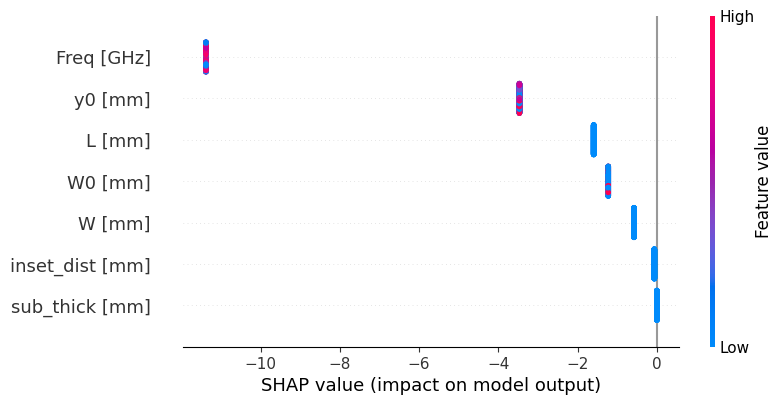

In [ ]:
fasttreeshap.plots.beeswarm(shap_values)

# Trying xgboost because it's supposedly faster

In [42]:
from xgboost import XGBRegressor
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import shap

model = XGBRegressor(n_estimators=100, min_child_weight=2, max_depth=10, learning_rate=0.15)
scaler = StandardScaler()
pipeline = Pipeline(steps=[('normalize', scaler), ('model', model)])

In [50]:
df = pd.read_csv("../test_data/patch_antenna/Patch Antenna S11 Data.csv")
input_x = df.drop(columns=['dB(S(1,1)) []'], axis=1)
input_x.rename(columns={'inset_dist [mm]': 'inset_dist', 'L [mm]': 'L', 'sub_thick [mm]': 'sub_thick', 'W [mm]': 'W', 'W0 [mm]': 'W0', 'y0 [mm]': 'y0', 'Freq [GHz]': 'Freq'}, inplace=True)
input_y = df[['dB(S(1,1)) []']]

In [52]:
input_x.shape

(40905, 7)

In [53]:
model.fit(input_x, input_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.15, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [54]:
explainer = shap.Explainer(model, input_x)

In [55]:
shap_values = explainer(input_x)

100%|===================| 40813/40905 [06:46<00:00]        

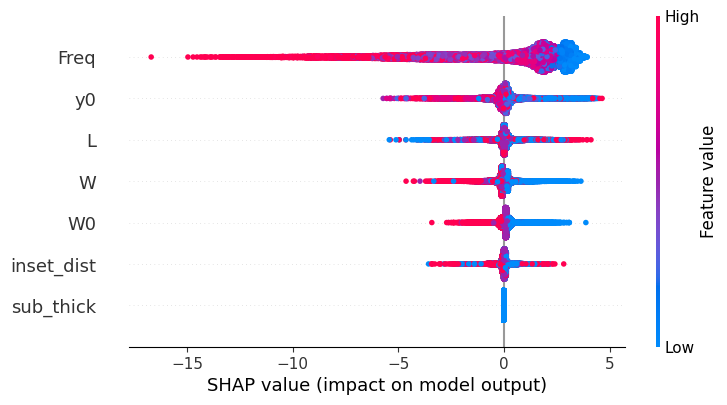

In [57]:
shap.plots.beeswarm(shap_values)